<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/06_logistic_regression/2_logistic_regression_theorie_invulversie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

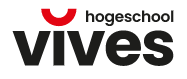<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# LOGISTIC REGRESSION: THEORIE

Deze notebook bevat de theorie over logistische regressie (Engels: logistic regression).

**OPGELET!** Logistic regression wordt toegepast bij classificatie!

## INLEIDING

**Perceptron**:
- voorspelling: 0 of 1
- voorbeeld:
 - "ik ben content" = 1
 - "ik ben dolgelukkig" = 1
- DISCREET


**Logistic regression**:
- voorspelling: tussen 0 en 1
- voorbeeld:
 - "ik ben content" = 0.6
 - "ik ben dolgelukkig" = 0.9
- CONTINU
- voorspelling kan als kans worden geïnterpreteerd:
 - kleiner dan 0.5: ontevreden
 - gelijk aan 0.5: neutraal
 - groter dan 0.5: tevreden


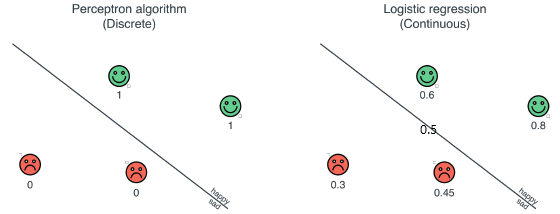

## SIGMOIDEFUNCTIE

#### **Stapfunctie versus Sigmoïdefunctie**

**Perceptron**: (heaviside) stapfunctie

> $H(x) =
  \left\{
    \begin{array}{l}
      1 \text{ if } x \geq 0 \\
      0 \text{ if } x < 0
    \end{array}
  \right.$

**Logistic regression**: sigmoïdefunctie of S-functie

> $\sigma(x)=\dfrac{1}{1+e^{-x}}$


Afgeleide van de sigmoïdefunctie is handiger!

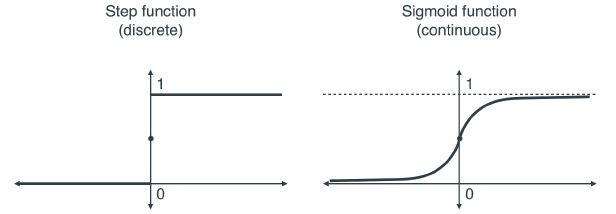

NOOT: stap- en sigmoïdefunctie zijn **activiatiefuncties** (Engels: activation function)

#### **Sigmoïdefunctie plotten**

In [ ]:
# plot de sigmoïdefunctie en de Heaviside stapfunctie uit op één en dezelfde grafiek


#### **Sigmoïdefunctiewaarden**

Gelijk aan 0 en 1 wanneer $x$ oneindig klein of groot is!!

- $\sigma(-\infty) = 0$
- $\sigma(0) = 0.5$
- $\sigma(+\infty) = 1$



In [ ]:
# creëer een dataframe met een kolom "x" die de waarden -Inf, -5, -1, 0, 1, 5, Inf bevat
# en een kolom "sigma" met de overeenkomstige sigmoïdefunctiewaarden


#### **Voorspellen met de sigmoïdefunctie**

Voorbeeld: Alien planet
- linear classifier: $x_1 + x_2 - 3.5 = 0$
- $x_1$ = #aack = 2
- $x_2$ = #beep = 3

In [ ]:
# bereken de score van het punt (x1, x2)
# bereken de predictie gebruik makend van de stapfunctie
# bereken de predictie gebruik makend van de sigmoïde functie
# print de resultaten uit


## ERRORFUNCTIES

#### **Algoritme**

**Logistic regression algoritme**:
- idem als perceptron algoritme
- *error functie is anders*

**Goeie error functies**:
- punt is correct geclassificeerd: kleine error
- punt is foutief geclassificeerd: grote error
- totale error van een verzameling datapunten = som van de individuele errors van die punten

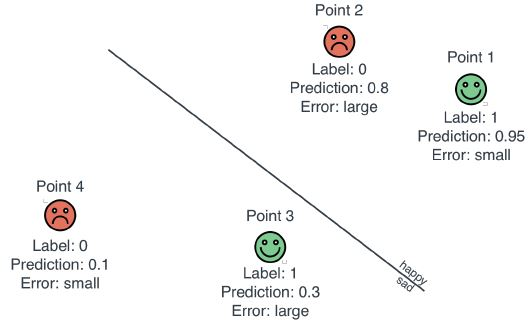

#### **Mogelijke error functies**

Veel mogelijkheden... wij bespreken er 3:
- **absolute loss**: $|y - y_p|$
- **square loss**: $(y- y_p)^2$
- **log loss** of **binary cross-entropy**: $-y\ln(y_p)-(1-y)\ln(1-y_p)$

met $y$ het label, $y_p$ de predictie en $\ln$ de natuurlijke logaritme

- absolute loss en square loss: zie regressie
- log loss: zie verder

In [ ]:
# neem de volgende labels met bijhorende voorspellingen berekend met de sigmoïdefunctie:
  #  y = 1, yp = 0.95
  #  y = 0, yp = 0.8
  #  y = 1, yp = 0.3
  #  y = 0, yp = 0.1
# bereken voor deze vier predicties de absolute loss, de square loss en de log loss
# definieer de loss functies als Python functies, eventueel gebruik makend van lambda
# zet labels, predicties en losses in een dataframe zodat de resultaten mooi worden gepresenteerd


#### **Natuurlijke logaritme**

Probleem bij **absolute en square loss**:
- fout is maximaal gelijk aan 1
- **te klein!**

Wat we willen:
- bij 100% correct label: fout gelijk aan 0
- bij 100% fout label: zeer grote fout

**natuurlijke logaritme** $\ln$:
- $\ln(x=1) = 0$
- $\ln(x=0) = -\infty$

**Oplossing:** $-\ln(x)$ nemen!

In [ ]:
# plot de grafiek van -ln(x)


#### **Log Loss**

Voorbeeld 1:
- label "happy": $y=1$
- voorspelling: $y_p=0.95$
- kans op "happy": $y_p=0.95$
- error: $-\ln(y_p)=-\ln(0.95)=0.051$

Voorbeeld 2:
- label "happy": $y=1$
- voorspelling: $y_p=0.3$
- kans op "happy": $y_p=0.3$
- error: $-\ln(y_p)=-\ln(0.3)=1.20$

Voorbeeld 3:
- label "sad": $y=0$
- voorspelling: $y_p=0.8$
- kans op "sad": $1-y_p=0.2$
- error: $-\ln(1-y_p)=-\ln(0.2)=1.61$

Voorbeeld 4:
- label "sad": $y=0$
- voorspelling: $y_p=0.1$
- kans op "sad": $1-y_p = 0.9$
- error: $-\ln(1-y_p)=-\ln(0.9)=0.11$

**Conclusie**:
- $y=1$: error = $-\ln(y_p) = -y\ln(y_p)$
- $y=0$: error = $-\ln(1-y_p) = -(1-y)\ln(1-y_p)$

**Samenvoegen**:
> error = $-y\ln(y_p) - (1-y)\ln(1-y_p)$

(bij $y=0$ is eerste term 0, bij $y=1$ is tweede term 0)


#### **Totale error**

- Error = -log van kans dat datapunt eigen label is

- Kans op onafhankelijke gebeurtenissen A en B en C en ...:
> $P(A \text{ en } B \text{ en } C \text{ en ...} ) = P(A) . P(B) . P(B) . \text{ ...}$

- som van logaritmes = logaritme van product:
> $\ln(p_1) + \ln(p_2) + \text{...} = \ln(p_1 . p_2 . \text{ ...})$

- loss = totale error:
> $\sum_{i=1}^{m}-y_i\ln(y_{p,i}) - (1-y_i)\ln(1-y_{p,i})$

- **Conclusie**: loss = totale error = -log van kans dat alle datapunten hun eigen label zijn!

- Voordeel: door logaritme te nemen leiden zeer kleine kansen niet tot zeer kleine loss...

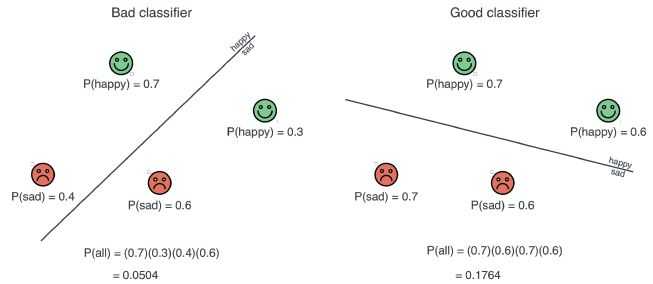

#### **Totale error: voorbeeldje**

punt 1 is "happy":
- label: $y_1=1$
- predictie: $y_{p,1}=0.95$
- kans dat punt 1 "happy" is: $P_1=y_{p,1}=0.95$

punt 2 is "sad":
- label: $y_2=0$
- predictie: $y_{p,2}=0.8$
- kans dat punt 2 "sad" is: $P_2=1-y_{p,2}=0.2$

kans dat punt 1 "happy" is én punt 2 "sad":
> $P_{tot} = P_1 . P_2 = 0.19$

In [ ]:
# reken het voorbeeldje na
# bereken de totale kans Ptot en -ln(Ptot)
# maak gebruik van numpy arrays en vectoriseer je expressies


Totale error berekenen met loss-functie:

In [ ]:
# bereken nu -ln(Ptot) mbv de log loss functie
# en de totale kans Ptot mbv exp(-loss)


## LOGISTIC REGRESSION TRICK

#### **Hoe kansen vergroten?**

- **Perceptron trick**:
 - punt correct geclassificeerd: rechte niet bewegen
 - punt foutief geclassificeerd: rechte beetje naar punt toe bewegen

- **Logistic Regression trick**:
 - punt correct geclassificeerd: rechte beetje weg van punt bewegen
 - punt foutief geclassificeerd: rechte beetje naar punt toe bewegen
 - in beide gevallen vergroot de kans op correcte classificatie!


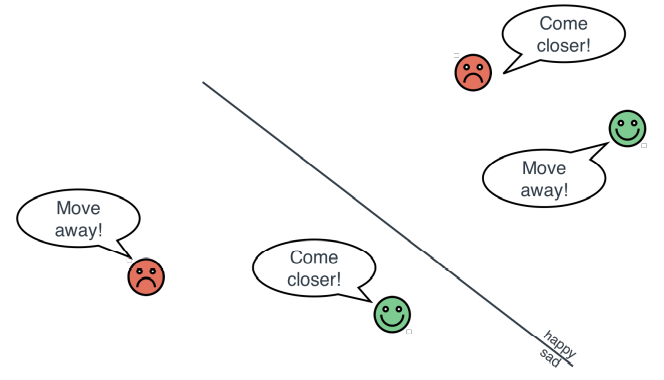

#### **Alien Planet: part I**

- **classifier**: $x_1 + x_2 - 4$
 - gewicht #aack = $w_1$ = 1
 - gewicht #beep = $w_2$ = 1
 - bias = $b$ = -4

- **perceptron**:
 - stapfunctie
 - $y_p = H(x_1 + x_2 - 4)$
 - $y_p \in \{0, 1\}$

- **logistic regression**:
 - sigmoïdefunctie
 - $y_p = \sigma(x_1 + x_2 - 4)$
 - $0 \leq y_p \leq 1$


In [ ]:
import numpy as np

zin = "aack beep beep aack beep beep"
y = 0  # label is "sad" -> foutief geclassificeerd

# bereken de predictie gebruik makend van de stapfunctie en de sigmoïdefunctie


#### **Alien Planet: part II**

Aanpassen van gewichten en bias:

- **perceptron trick**:
 - $w_i \gets w_i + \eta(y-y_p)x_i$
 - $b \gets b + \eta(y-y_p)$

- **logistic regression trick**:
 - $w_i \gets w_i + \eta(y-y_p)x_i$
 - $b \gets b + \eta(y-y_p)$

In beide gevallen hetzelfde!!


In [ ]:
eta = 0.01  # learning rate

# pas nu w en b aan mbv de perceptron trick en de logistic regression trick
# maak gebruik van de predicties die je in de vorige paragraaf hebt berekend
# bereken ook de predicties met de nieuwe classifier, dus met de aangepaste w en b


#### **Alien Planet: part III**

Stel: punt is **correct** geclassificeerd
- **perceptron**: lijn blijft, classifier wordt niet verbeterd
- **logistic regression**: lijn beweegt wel, classifier wordt verbeterd!

In [ ]:
y = 1  # label is "happy" -> correct!

# pas opnieuw de oorspronkelijke w en b aan mbv de perceptron trick en de logistic regression trick
# maar deze keer met label y = 1
# en bereken de predicties met deze nieuwe classifier, dus met de aangepaste w en b


#### **Logistic regression trick: code**

- Zelfde als perceptron trick
- Enkel stapfunctie vervangen door sigmoïde functie

In [ ]:
import numpy as np

# definieer eerst de sigmoïde functie als een aparte Python functie sigmoid()
# schrijf dan de functie logistic_regression_trick() met inputparameters w, b, x, y en eta


In [ ]:
# test
zin = "aack beep beep aack beep beep"
y = 0  # label is "sad" -> foutief geclassificeerd
w = np.array([1, 1])
b = -4

# bepaal x
# pas dan de functie logistic_regression_trick() toe
# om de gegeven classifier aan te passen


## LOGISTIC REGRESSION ALGORITME

#### **Logistic regression error: code**

- scores: zelfde berekening als bij perceptron
- predicties: sigmoïdefunctie ipv stapfunctie
- erros: log loss ipv perceptron error

In [ ]:
# schrijf een functie logistic_regression_error() met inputparameters w, b, X, y
# pas op! X moet een 2D matrix zijn (vandaar de hoofdletter)


In [ ]:
# voorbeeld
zin = "aack beep beep aack beep beep"
y = 0  # label is "sad" -> foutief geclassificeerd
w = np.array([1, 1])
b = -4

# bepaal X (hoofdletter, dus 2D matrix!)
# pas de functie logistic_regression_error() toe op het voorbeeld
# om de gegeven classifier w, b aan te passen


#### **Logistic regression algoritme: code**

Idem als perceptron algoritme, tenzij:
- `logistic_regression_trick()` ipv `perceptron_trick()`
- `logistic_regression_error()` ipv `perceptron_error()`

In [ ]:
# schrijf de functie logistic_regression() met inputparameters X, y, num_of_epochs en eta


#### **Alien Planet: part I**

- aliens2.csv inlezen
- logistic regression toepassen:
 - aantal epochs = 1000
 - learning rate = 0.1

In [ ]:
# pas de functie logistic_regression() toe op de dataset


In [ ]:
# plot ook totale error in functie van epoch


#### **Alien Planet: part II**

- voorspellingen: scores transformeren mbv sigmoïdefunctie -> kansen
- kansen -> labels: kansen afronden
- plot maken: zelfde functie als `plot_perceptron()`

In [ ]:
# voorspellingen (kansen)


In [ ]:
# labels


In [ ]:
# plot


#### **Gradient Descent**

- net als bij lineaire regressie en perceptron passen we Stochastic Gradient Descent (SGD) toe
- "foutenberg" (mount errorest) stap voor stap afdalen
- elk punt op de berg is een mogelijke classifier (x1, x2, b)
- hoogte van het punt = error = log loss
- wiskundig gezien: "trick" = gradiënt van lossfunctie benaderen obv 1 punt om gewichten aan te passen

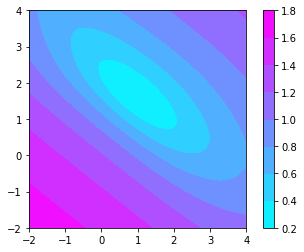

In [ ]:
nw = 100  # aantal intervallen voor w1 en w2
w1 = np.linspace(-2, 4, nw)  # w1 varieert van -2 tot 4
w2 = w1.copy()  # idem voor w2
b = -4  # bias laten we niet variëren
errors = np.zeros((nw, nw))  # error matrix initialiseren

# log loss error berekenen voor elke combinatie van w1 en w2
for i in range(nw):
    for j in range(nw):
        errors[i, j] = logistic_regression_error(np.array([w1[i], w2[j]]), b, X, y)

# contour plot maken van onze error functie
fig, ax = plt.subplots()
w2, w1 = np.meshgrid(w2, w1)  # meshgrid matrices voor w1 en w2
cs = ax.contourf(w1, w2, np.log10(errors),  # log(errors) geeft duidelijker contouren
                 cmap=plt.cm.cool);  # filled contour
ax.set_aspect("equal")  # assen gelijke schaal geven
fig.colorbar(cs);  # colorbar toevoegen

## SCIKIT-LEARN

- `LogisticRegression` klasse in module `linear_model`
- zelfde interface als `Perceptron` klasse:
 - attribuut `coef_`: gewichten
 - attribuut `intercept_`: bias
- verschillende solvers mogelijk, maar geen SGD, dus geen learning rate!
- `penalty="none"`: geen regularisatie (zie topic 4)

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

lr = LR(penalty='none')
lr.fit(X, y)
print("gewichten:", lr.coef_.flatten(), "bias:", lr.intercept_.item())

gewichten: [ 9.87462681 17.69130014] bias: -46.142446261708024


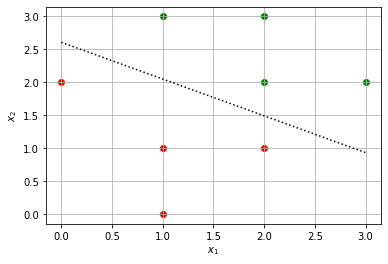

In [ ]:
plot_logistic_regression(X, y, lr.coef_.flatten(), lr.intercept_.item())

## CODE REFACTORING

#### **Superklasse Classifier**

- losse functies onderbrengen in 1 klasse
- veel code gekopieerd van perceptron: overerving toepassen
- beginnen met abstracte superklasse `Classifier`

In [ ]:
from abc import ABC, abstractmethod
import numpy as np
import matplotlib.pyplot as plt

class Classifier(ABC):

    # constructor
    def __init__(self, num_of_epochs, learning_rate):
        pass # vervang pass door code

    # berekent score voor meerdere datapunten
    def score(self, X):
        pass # vervang pass door code

    # berekent voorspelling voor meerdere datapunten
    def predict(self, X):
        pass # vervang pass door code

    # past gewichten en bias aan obv 1 punt
    def _trick(self, x, y):
        pass # vervang pass door code

    # activatiefunctie
    @abstractmethod
    def _activation(self, y, yp):
        pass # niet vervangen, want abstracte methode

    # berekent errors van meerdere datapunten
    @abstractmethod
    def _errors(self, X, y):
        pass # niet vervangen, want abstracte methode

    # traint model
    def fit(self, X, y):
        pass # vervang pass door code

    # plot totale error vs epoch
    def plot_error(self):
        pass # vervang pass door code

    # plot 2D classifier (2 features)
    def plot2D(self, X, y):
        pass # vervang pass door code

#### **Subklassen Perceptron en LogisticRegression**

- subklassen `Perceptron` en `LogisticRegression`
- abstracte methodes `_loss()` en `_errors()` implementeren

In [ ]:
class Perceptron(Classifier):

    def __init__(self, num_of_epochs=100, learning_rate=0.01):
        pass # vervang pass door code

    def _activation(self, scores):
        pass # vervang pass door code

    def _errors(self, X, y):
        pass # vervang pass door code


class LogisticRegression(Classifier):

    def __init__(self, num_of_epochs=200, learning_rate=0.1):
        pass # vervang pass door code

    def _activation(self, scores):
        pass # vervang pass door code

    def _errors(self, X, y):
        pass # vervang pass door code

#### **Test klasse Perceptron**

- "aliens2.csv" inlezen
- klasse `Perceptron` toepassen

#### **Test klasse LogisticRegression**

- "aliens2.csv" inlezen
- klasse `LogisticRegression` toepassen

## MULTINOMIAL CLASSIFICATION

- binaire classificatie: 2 klassen
- multinomiale classificatie: **meer dan 2 klassen**
 - $k$ klassen
 - 1 classifier voor elke klasse toepassen
 - datapunt krijgt score $a_i$ voor elke klasse $i$
 - **Softmaxfunctie** toepassen
 - predictie: $y_p = \dfrac{e^{a_i}}{e^{a_1}+e^{a_2}+...+e^{a_k}}$
- **voorbeeld**:
 - klassen: hond, kat, vogel
 - score hond = 2, score kat = 0, score vogel = -2


In [ ]:
import numpy as np

softmax = lambda a: np.exp(a) / np.sum(np.exp(a))
a = np.array([2, 0, -2])  # hond, kat, vogel
print(softmax(a))

[0.86681333 0.11731043 0.01587624]


- interpreteren als kansen:
 - kans op hond: 86.7 %
 - kans op kat: 11.7 %
 - kans op vogel: 1.6 %
- totale kans = 100 %



---



---
## BRONNEN
*  Handboek: Grokking Machine Learning (version 12), Manning Early Access Program, by Luis G. Serrano, 2020.
*  Online Scikit-Learn documentation: https://scikit-learn.org/stable/

---